# Homework 8

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
data = pd.read_csv('../../homework_data/sem_8/ugnivenko.va.csv', header = None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
192,21.390726,0.042150,0.269771,0.094176,-0.074871,-0.973389,-1.324200,1.856056,0.638555,-1.010321,2.051191
384,20.151777,0.194091,0.307718,-1.791682,-0.114337,0.382058,0.590876,-0.749354,-1.712827,-0.922595,0.073207
777,21.464295,-0.053953,-0.895866,-0.146469,1.357840,1.142103,0.109138,0.940866,0.318459,0.035420,-0.252449
915,19.045658,1.072132,-0.496071,-0.857555,1.388788,0.231568,-1.674133,-1.097390,-0.805630,0.822606,-0.184824
858,18.163929,-1.215011,1.067284,-0.244911,0.219385,-0.633407,-0.596476,0.512965,1.551872,-0.165495,2.224619


In [17]:
data.shape

(1000, 11)

In [3]:
y = data.values.T[0]
x = data.values.T[1:]

In [16]:
x.shape

(10, 1000)

In [18]:
y.shape

(1000,)

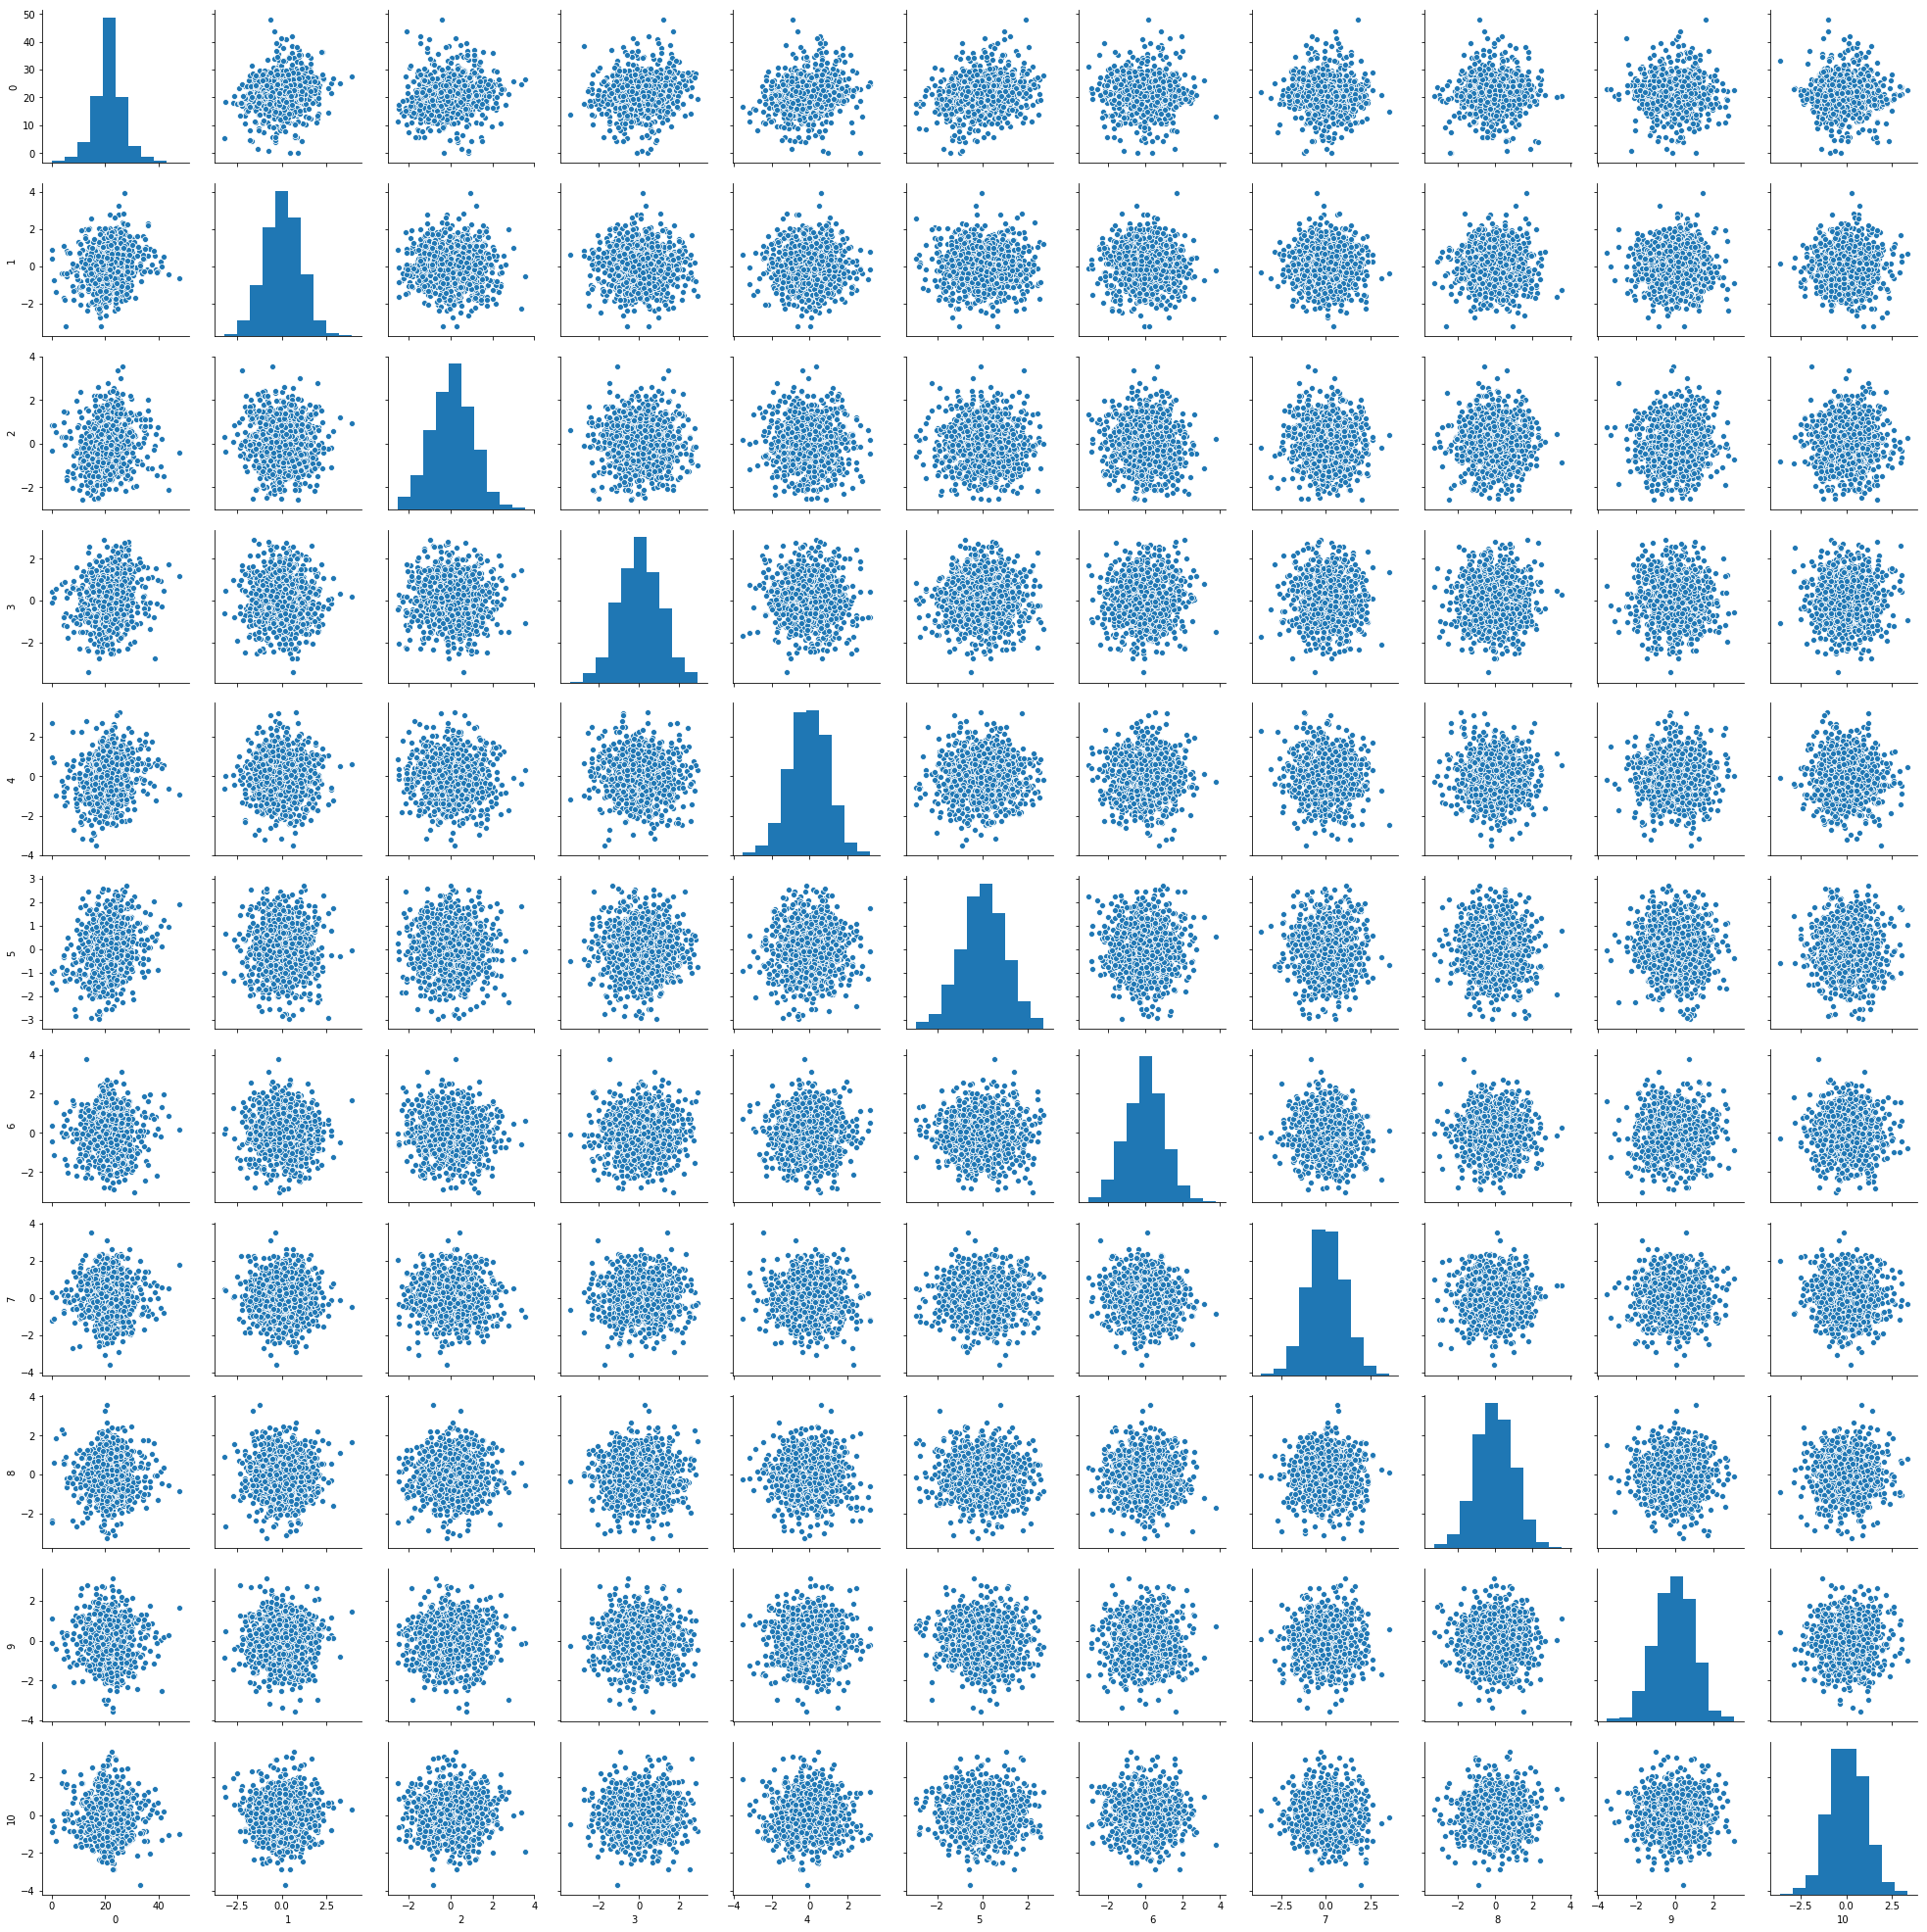

In [8]:
_ = sns.pairplot(data)

# Постройте линейную модель Y от X и свободного коэффициента. Проверьте, есть ли гетероскедастичность в выборке с использованием критерия Бройша-Пагана (использовать F-test, см. справку по критерию)

In [19]:
a = np.ones((y.shape[0], 1))
X = np.concatenate((a.T, x), axis=0)
pd.DataFrame(X.T).sample(5)

,0,1,2,3,4,5,6,7,8,9,10
744,1.0,-0.008664,-0.775245,-0.325149,-1.944932,-1.448463,-0.570988,0.004879,0.375837,0.613316,0.674329
503,1.0,0.685823,-0.394059,-0.721707,-0.010734,-1.196483,-0.262178,-0.178324,1.866355,0.305698,2.543375
233,1.0,-0.053855,0.707287,-1.371276,1.549387,0.112364,-0.350002,-0.478624,0.925218,-2.137520,-1.002725
183,1.0,-1.758211,0.098512,-0.234666,-1.088308,2.539748,0.785063,1.311812,0.510668,-0.210807,-0.540779
352,1.0,-0.394343,-1.060701,-0.488661,-1.010282,-1.438010,0.182143,1.507454,-0.099245,-0.112844,0.504932


In [21]:
X.T.shape

(1000, 11)

In [20]:
model = OLS(y ,X.T).fit()
model.params

array([ 2.13028560e+01,  1.08234442e+00,  8.58761412e-01,  1.00431322e+00,
        1.12206062e+00,  1.25314681e+00,  1.33265821e-02, -1.28186742e-02,
        2.04373803e-01, -4.25117929e-02, -7.98622223e-02])

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     21.11
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           7.05e-36
Time:                        12:57:28   Log-Likelihood:                -3054.0
No. Observations:                1000   AIC:                             6130.
Df Residuals:                     989   BIC:                             6184.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3029      0.164    129.768      0.000      20.981      21.625
x1             1.0823      0.165      6.546      0.000       0.758       1.407
x2             0.8588      0.167      5.145      0.000       0.531       1.186
x3             1.0043      0.158      6.352      0.000       0.694       1.315
x4             1.1221      0.160      7.022      0.000       0.808       1.436
x5             1.2531      0.166      7.563      0.000       0.928       1.578
x6             0.0133      0.162      0.082      0.935      -0.305       0.332
x7            -0.0128      0.165     -0.078      0.938      -0.337       0.311
x8             0.2044      0.163      1.251      0.211      -0.116       0.525
x9            -0.0425      0.163     -0.261      0.794      -0.362       0.277
x10           -0.0799      0.163     -0.489      0.625      -0.401       0.241
==============================================================================
Omnibus:                       81.073   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.545
Skew:                           0.111   Prob(JB):                     1.58e-90
Kurtosis:                       6.143   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
if het_breuschpagan(model.resid, X.T)[3] > 0.05:
    print('Homoscedasticity')
else:
    print('Heteroscedasticity')

Homoscedasticity


# Оптимальное значение lambda для преобразования Бокса-Кокса на переменную Y (использовать scipy.stats)

In [28]:
lambda_opt = st.boxcox(y)[1]
print('optimal lambda = {}'.format(np.around(lambda_opt ,decimals = 3)))

optimal lambda = 1.05


# Постройте линейную модель Y от X и свободного коэффициента для первых 100 элементов выборки. Сколько переменных являются избыточными согласно t-критерию? Поправку на множественность гипотез проигнорировать

In [29]:
X_new = X.T[0 : 100]
y_new = y[0:100]
X_new.shape, y_new.shape

((100, 11), (100,))

In [30]:
model_new = OLS(y_new ,X_new).fit()
model_new.params

array([ 2.10991239e+01,  1.00001246e+00,  1.00000008e+00,  1.00000887e+00,
        1.00001348e+00,  9.99982916e-01,  5.62936944e-06,  1.69714483e-05,
       -3.76800982e-06, -1.35401425e-06,  1.00655125e-05])

In [31]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.373e+09
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:09:06   Log-Likelihood:                 778.57
No. Observations:                 100   AIC:                            -1535.
Df Residuals:                      89   BIC:                            -1506.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0991   1.09e-05   1.94e+06      0.000      21.099      21.099
x1             1.0000   1.12e-05   8.92e+04      0.000       1.000       1.000
x2             1.0000   1.05e-05   9.54e+04      0.000       1.000       1.000
x3             1.0000   1.08e-05   9.25e+04      0.000       1.000       1.000
x4             1.0000   1.13e-05   8.82e+04      0.000       1.000       1.000
x5             1.0000   1.12e-05   8.89e+04      0.000       1.000       1.000
x6          5.629e-06   1.15e-05      0.492      0.624   -1.71e-05    2.84e-05
x7          1.697e-05   1.05e-05      1.613      0.110   -3.93e-06    3.79e-05
x8         -3.768e-06   1.02e-05     -0.368      0.713   -2.41e-05    1.66e-05
x9         -1.354e-06   9.72e-06     -0.139      0.890   -2.07e-05     1.8e-05
x10         1.007e-05   1.06e-05      0.953      0.343   -1.09e-05     3.1e-05
==============================================================================
Omnibus:                        0.816   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.889
Skew:                          -0.104   Prob(JB):                        0.641
Kurtosis:                       2.588   Cond. No.                         1.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Смотрим на P>|t|: (не нулевые) => 5 переменных являются избытычными.

# Имеет ли смысл данная модель согласно F-критерию?

In [33]:
model_new.f_test('const = x1 = x2 = x3 = x4 = x5 = x6 = x7 = x8 = x9 = x10 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.66059914e+11]]), p=0.0, df_denom=89, df_num=11>

In [34]:
p_value = model_new.f_pvalue
if p_value >= 0.05:
    print('не имеет смысл')
else: 
    print('имеет смысл')

имеет смысл


# Можно ли обнулить первые четыре переменные согласно критерию Вальда? 

In [35]:
model_new.wald_test('x1 = x2 = x3 = x4 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[9.19666877e+09]]), p=0.0, df_denom=89, df_num=4>

In [36]:
model_new.wald_test('x1 = x2 = x3 = x4 = 0').summary()

'<F test: F=array([[9.19666877e+09]]), p=0.0, df_denom=89, df_num=4>'

Нельзя